In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langconv import *
import os
import codecs

import matplotlib.pyplot as plt

import jieba
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import wikipedia

# Read from a file of sensitive web addresses

In [2]:
# This will take lots of time. Plz skip this cell if you wanna run the following codes.
# The file for NLP modeling is already prepared in the folders.
if 0==1:
    f = open("block.txt","r") 
    heihei = []
    lines = f.read().splitlines()
    for line in lines:
        heihei.append(line[22:])
    print(heihei)

# Extrat their summary and save to files

In [3]:
 if 0 == 1:
    count = 0
    for i in heihei:
        yoyo = wikipedia.summary(i)
        data=open("d_"+str(count)+".txt",'w+') 
        print(yoyo,file=data)
        data.close()
        count +=1

# Name Entity Analysis

In [4]:
import spacy
import pandas as pd
import itertools as it

nlp = spacy.load('en')

In [5]:
f = open('d_0.txt','r')
parsed_txt = nlp(str(f.read().splitlines()))

In [6]:
print(parsed_txt)

['Charter 08 is a manifesto initially signed by 303 Chinese dissident intellectuals and human rights activists. It was published on 10 December 2008, the 60th anniversary of the Universal Declaration of Human Rights, adopting name and style from the anti-Soviet Charter 77 issued by dissidents in Czechoslovakia. Since its release, more than 10,000 people inside and outside China have signed the charter.In 2009, one of the authors of Charter \'08, Liu Xiaobo, was sentenced to eleven years\' imprisonment for "inciting subversion of state power" because of his involvement. A year later, Liu was awarded the 2010 Nobel Peace Prize by the Norwegian Nobel Committee. Seven years later in July 2017, he died of terminal liver cancer in the prison after having been granted medical parole.']


In [7]:
for num, sentence in enumerate(parsed_txt.sents):
    print ('Sentence {}:'.format(num + 1))
    print (sentence)
    print ('')

Sentence 1:
['Charter 08 is a manifesto initially signed by 303 Chinese dissident intellectuals and human rights activists.

Sentence 2:
It was published on 10 December 2008, the 60th anniversary of the Universal Declaration of Human Rights, adopting name and style from the anti-Soviet Charter 77 issued by dissidents in Czechoslovakia.

Sentence 3:
Since its release, more than 10,000 people inside and outside China have signed the charter.

Sentence 4:
In 2009, one of the authors of Charter \'08, Liu Xiaobo, was sentenced to eleven years\' imprisonment for "inciting subversion of state power" because of his involvement.

Sentence 5:
A year later, Liu was awarded the 2010 Nobel Peace Prize by the Norwegian Nobel Committee.

Sentence 6:
Seven years later in July 2017, he died of terminal liver cancer in the prison after having been granted medical parole.']



In [8]:
for num, entity in enumerate(parsed_txt.ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print ('')

Entity 1: Charter 08 - LAW

Entity 2: 303 - CARDINAL

Entity 3: Chinese - NORP

Entity 4: 10 December 2008 - DATE

Entity 5: 60th - ORDINAL

Entity 6: the Universal Declaration of Human Rights - LAW

Entity 7: Czechoslovakia - GPE

Entity 8: more than 10,000 - CARDINAL

Entity 9: China - GPE

Entity 10: 2009 - DATE

Entity 11: one - CARDINAL

Entity 12: Charter \'08 - FAC

Entity 13: Liu Xiaobo - PERSON

Entity 14: eleven - CARDINAL

Entity 15: A year later - DATE

Entity 16: Liu - PERSON

Entity 17: 2010 - DATE

Entity 18: Nobel Peace Prize - WORK_OF_ART

Entity 19: the Norwegian Nobel Committee - ORG

Entity 20: Seven years later - DATE

Entity 21: July 2017 - DATE



In [9]:
token_text = [token.orth_ for token in parsed_txt]
token_pos = [token.pos_ for token in parsed_txt]

pd.DataFrame(token_text, token_pos)

,0
PUNCT,[
PUNCT,'
NOUN,Charter
NUM,08
AUX,is
...,...
ADJ,medical
NOUN,parole
PUNCT,.
PUNCT,'


In [10]:
token_lemma = [token.lemma_ for token in parsed_txt]
token_shape = [token.shape_ for token in parsed_txt]

pd.DataFrame(token_text, [token_lemma, token_shape])
             #columns=['token_lemma', 'token_shape'])

,,0
[,[,[
',','
charter,Xxxxx,Charter
08,dd,08
be,xx,is
...,...,...
medical,xxxx,medical
parole,xxxx,parole
.,.,.
',','


In [11]:
token_entity_type = [token.ent_type_ for token in parsed_txt]
token_entity_iob = [token.ent_iob_ for token in parsed_txt]

pd.DataFrame(token_text, [token_entity_type, token_entity_iob])#,
             #columns=['token_text', 'entity_type', 'inside_outside_begin'])



0
    O        [
    O        '
LAW B  Charter
    I       08
    O       is
...        ...
    O  medical
    O   parole
    O        .
    O        '
    O        ]

[149 rows x 1 columns]

In [12]:
token_attributes = [(token.orth_,
                     token.prob,
                     token.is_stop,
                     token.is_punct,
                     token.is_space,
                     token.like_num,
                     token.is_oov)
                    for token in parsed_txt]

df = pd.DataFrame(token_attributes,
                  columns=['text',
                           'log_probability',
                           'stop?',
                           'punctuation?',
                           'whitespace?',
                           'number?',
                           'out of vocab.?'])

df.loc[:, 'stop?':'out of vocab.?'] = (df.loc[:, 'stop?':'out of vocab.?']
                                       .applymap(lambda x: u'Yes' if x else u''))
                                               
df

,text,log_probability,stop?,punctuation?,whitespace?,number?,out of vocab.?
0,[,-20.0,,Yes,,,Yes
1,',-20.0,,Yes,,,Yes
2,Charter,-20.0,,,,,Yes
3,08,-20.0,,,,Yes,Yes
4,is,-20.0,Yes,,,,Yes
...,...,...,...,...,...,...,...
144,medical,-20.0,,,,,Yes
145,parole,-20.0,,,,,Yes
146,.,-20.0,,Yes,,,Yes
147,',-20.0,,Yes,,,Yes


# Phrase Modeling

In [13]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
#import cPickle as pickle
import _pickle as pickle
import os
import codecs

In [14]:
def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def line_review(filename):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for review in f:
            yield review.replace('\\n', '\n')
            
def lemmatized_sentence_corpus(filename):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    for parsed_review in nlp.pipe(line_review(filename),
                                  batch_size=10000, n_threads=4):
        
        for sent in parsed_review.sents:
            yield u' '.join([token.lemma_ for token in sent
                             if not punct_space(token)])

In [15]:
if 0 ==1:
    with open('blocked_all.txt','w') as f:
        for i in range(112):
            with open('d_'+str(i)+'.txt','r') as ff:
                f.write(ff.read())

In [16]:
if 0 == 0:

    with codecs.open('unigram.txt', 'w', encoding='utf_8') as f:
         for sentence in lemmatized_sentence_corpus('blocked_all.txt'):
                f.write(sentence + '\n')

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:774: DeprecationWarning: [W016] The keyword argument `n_threads` is now deprecated. As of v2.2.2, the argument `n_process` controls parallel inference via multiprocessing.
  warnings.warn(Warnings.W016, DeprecationWarning)


In [17]:
unigram_sentences = LineSentence('unigram.txt')

In [18]:
for unigram_sentence in it.islice(unigram_sentences, 230, 240):
    print (u' '.join(unigram_sentence))
    print (u'')

the Communist Party of China CPC simplify Chinese 中国共产党 traditional Chinese 中國共產黨 pinyin Zhōngguó Gòngchǎndǎng commonly know as the Chinese Communist Party CCP be the found and sole govern political party of the People 's Republic of China PRC

the CCP lead eight other legally permit subordinate minor party together as the United Front

the CCP be found in 1921 with the help of the Far East Bureau of the Russian Communist Party Bolsheviks and Far East Secretariat of the Communist International

the party grow quickly and by 1949 -PRON- have drive the Kuomintang KMT 's Nationalist Government from mainland China to Taiwan after the Chinese Civil War lead to the establishment of the People 's Republic of China on 1 October 1949

-PRON- control the country 's armed force the People 's Liberation Army PLA

the CCP be officially organize on the basis of democratic centralism a principle conceive by russian marxist theoretician Vladimir Lenin which entail a democratic and open discussion on p

In [19]:
bigram_model = Phrases(unigram_sentences)

bigram_model.save('bigram_model_all')
    
# load the finished model from disk
bigram_model = Phrases.load('bigram_model_all')

In [20]:
with codecs.open('bigram_sentences_all.txt', 'w', encoding='utf_8') as f:
    for unigram_sentence in unigram_sentences:
        bigram_sentence = u' '.join(bigram_model[unigram_sentence])
        f.write(bigram_sentence + '\n')

In [21]:
bigram_sentences = LineSentence('bigram_sentences_all.txt')

In [22]:
for bigram_sentence in it.islice(bigram_sentences, 230, 240):
    print (u' '.join(bigram_sentence))
    print (u'')

the Communist_Party of China CPC simplify_Chinese 中国共产党 traditional_Chinese 中國共產黨 pinyin Zhōngguó Gòngchǎndǎng commonly know_as the Chinese_Communist Party_CCP be the found and sole govern political party of the People_'s Republic_of China_PRC

the CCP lead eight other legally permit subordinate minor party together as the United Front

the CCP be found in 1921 with the help of the Far East Bureau of the Russian Communist_Party Bolsheviks and Far East Secretariat of the Communist International

the party grow quickly and by 1949 -PRON- have drive the Kuomintang_KMT 's Nationalist Government from mainland_China to Taiwan after the Chinese_Civil War lead to the establishment of the People_'s Republic_of China on 1 October 1949

-PRON- control the country 's armed force the People_'s Liberation_Army PLA

the CCP be officially organize on the basis of democratic centralism a principle conceive by russian marxist theoretician Vladimir Lenin which entail a democratic and open discussion on p

In [23]:
if 0 == 0:

    trigram_model = Phrases(bigram_sentences)

    trigram_model.save('trigram_model_all')
    
# load the finished model from disk
trigram_model = Phrases.load('trigram_model_all')

In [24]:
if 0 == 0:

    with codecs.open('trigram_sentences_all.txt', 'w', encoding='utf_8') as f:
        
        for bigram_sentence in bigram_sentences:
            
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            
            f.write(trigram_sentence + '\n')

In [25]:
trigram_sentences = LineSentence('trigram_sentences_all.txt')

In [26]:
for trigram_sentence in it.islice(trigram_sentences, 230, 240):
    print (u' '.join(trigram_sentence))
    print (u'')

the Communist_Party of China CPC simplify_Chinese 中国共产党 traditional_Chinese 中國共產黨 pinyin Zhōngguó Gòngchǎndǎng commonly know_as the Chinese_Communist_Party_CCP be the found and sole govern political party of the People_'s_Republic_of China_PRC

the CCP lead eight other legally permit subordinate minor party together as the United Front

the CCP be found in 1921 with the help of the Far East Bureau of the Russian Communist_Party Bolsheviks and Far East Secretariat of the Communist International

the party grow quickly and by 1949 -PRON- have drive the Kuomintang_KMT 's Nationalist Government from mainland_China to Taiwan after the Chinese_Civil_War lead to the establishment of the People_'s_Republic_of China on 1 October 1949

-PRON- control the country_'s armed force the People_'s_Liberation_Army PLA

the CCP be officially organize on the basis of democratic centralism a principle conceive by russian marxist theoretician Vladimir Lenin which entail a democratic and open discussion on p

In [27]:
if 0 == 0:

    with codecs.open('trigram_transformed_txt_all.txt', 'w', encoding='utf_8') as f:
        
        for parsed_review in nlp.pipe(line_review('blocked_all.txt'),
                                      batch_size=10000, n_threads=7):
            
            # lemmatize the text, removing punctuation and whitespace
            unigram_review = [token.lemma_ for token in parsed_review
                              if not punct_space(token)]
            
            # apply the first-order and second-order phrase models
            bigram_review = bigram_model[unigram_review]
            trigram_review = trigram_model[bigram_review]
            
            # remove any remaining stopwords
            trigram_review = [term for term in trigram_review
                              if term not in spacy.lang.en.stop_words.STOP_WORDS] 
            
            # write the transformed review as a line in the new file
            trigram_review = u' '.join(trigram_review)
            f.write(trigram_review + '\n')

/Users/wan/opt/anaconda3/lib/python3.8/site-packages/spacy/language.py:774: DeprecationWarning: [W016] The keyword argument `n_threads` is now deprecated. As of v2.2.2, the argument `n_process` controls parallel inference via multiprocessing.
  warnings.warn(Warnings.W016, DeprecationWarning)


In [31]:
if 0 == 0:

    trigram_reviews = LineSentence('trigram_transformed_txt_all.txt')

    # learn the dictionary by iterating over all of the reviews
    trigram_dictionary = Dictionary(trigram_reviews)
    
    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    trigram_dictionary.compactify()

    trigram_dictionary.save('trigram_dict_all.dict')
    
# load the finished dictionary from disk
trigram_dictionary = Dictionary.load('trigram_dict_all.dict')

In [32]:
def trigram_bow_generator(filepath):
    """
    generator function to read reviews from a file
    and yield a bag-of-words representation
    """
    
    for review in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(review)

In [33]:
if 0 == 0:

    # generate bag-of-words representations for
    # all reviews and save them as a matrix
    MmCorpus.serialize('trigram_bow_corpus_all.mm',
                       trigram_bow_generator('trigram_transformed_txt_all.txt'))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus('trigram_bow_corpus_all.mm')

# Generate a Word Cloud

In [28]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [29]:
text = open('blocked_all.txt','r').read()

In [30]:
wordcloud = WordCloud(font_path="wr.ttf",
                      width=1000,
                        height=800,
                        margin=2,
                        background_color='white',
                      scale=5,
                      ).generate(text)
wordcloud.to_file('output.png')

# LDA topic modeling

In [34]:
lda_model_filepath = 'lda_model_all'

In [35]:
if 0 == 0:

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=20,
                           id2word=trigram_dictionary,
                           workers=3)
    
    lda.save('lda_model_all')
    
# load the finished LDA model from disk
lda = LdaMulticore.load('lda_model_all')

In [36]:
def explore_topic(topic_number, topn=20):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print (u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=20):
        print (u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [37]:
explore_topic(topic_number=19)

term                 frequency

China                0.032
figure               0.021
people               0.021
state                0.020
term                 0.020
official             0.020
include              0.019
world                0.018
religious            0.017
China_'s             0.016
current              0.016
social               0.014
bear                 0.014
political            0.014
power                0.014
use                  0.014
government           0.013
new                  0.013
head                 0.013
United               0.012


In [38]:
topic_names = {0: u'country',
               1: u'government',
               2: u'protest',
               3: u'release',
               4: u'US',
               5: u'PRC',
               6: u'company',
               7: u'official',
               8: u'war',
               9: u'CCP',
               10: u'party',
               11: u'social_movement',
               12: u'HK_protest',
               13: u'city',
               14: u'policy',
               15: u'arrest',
               16: u'freedom',
               17: u'China',
               18: u'order',
               19: u'world'}

In [39]:
topic_names_filepath = 'topic_names.pkl'

with open(topic_names_filepath, 'wb') as f:
    pickle.dump(topic_names, f)

In [40]:
LDAvis_data_filepath = 'ldavis_prepared'

In [41]:
if 0 == 0:

    LDAvis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus,
                                              trigram_dictionary)

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [42]:
pyLDAvis.display(LDAvis_prepared)

# Word Vector Embedding

In [43]:
from gensim.models import Word2Vec

trigram_sentences = LineSentence('trigram_sentences_all.txt')
word2vec_filepath = 'word2vec_model_all'

In [44]:
if 0 == 0:

    # initiate the model and perform the first epoch of training
    sen2vec = Word2Vec(trigram_sentences, size=100, window=5,
                        min_count=20, sg=1, workers=4)
    
    sen2vec.save(word2vec_filepath)

In [45]:
%%time
if 0 == 0:
    token_count = sum([len(sentence) for sentence in trigram_sentences])
    # perform another 11 epochs of training
    for i in range(1,12):

        sen2vec.train(trigram_sentences, total_examples= token_count, epochs=sen2vec.epochs)
        sen2vec.save(word2vec_filepath)
        print (u'{} training epochs so far.'.format(sen2vec.train_count))
        
# load the finished model from disk
sen2vec = Word2Vec.load(word2vec_filepath)
sen2vec.init_sims()

print (u'{} training epochs so far.'.format(sen2vec.train_count))

2 training epochs so far.
3 training epochs so far.
4 training epochs so far.
5 training epochs so far.
6 training epochs so far.
7 training epochs so far.
8 training epochs so far.
9 training epochs so far.
10 training epochs so far.
11 training epochs so far.
12 training epochs so far.
12 training epochs so far.
CPU times: user 2.18 s, sys: 97.9 ms, total: 2.28 s
Wall time: 1.4 s


In [46]:
print (u'{:,} terms in the sen2vec vocabulary.'.format(len(sen2vec.wv.vocab)))

147 terms in the sen2vec vocabulary.


In [47]:
# build a list of the terms, integer indices,
# and term counts from the food2vec model vocabulary
ordered_vocab = [(term, voc.index, voc.count)
                 for term, voc in sen2vec.wv.vocab.items()]

# sort by the term counts, so the most common terms appear first
ordered_vocab = sorted(ordered_vocab, key=lambda x: -x[2])

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

# create a DataFrame with the food2vec vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(sen2vec.wv.vectors_norm[term_indices, :],
                            index=ordered_terms)

word_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
the,0.116281,0.044076,-0.052049,-0.138071,0.020045,0.180557,0.058262,0.254115,0.012290,-0.120932,...,0.004061,0.045824,0.057307,0.064906,0.034939,0.088037,0.060641,0.177250,0.111160,-0.091238
of,-0.123526,0.153112,0.034007,-0.014660,-0.106673,0.158681,0.128522,0.076208,0.037441,0.012873,...,0.057469,0.027346,0.140415,0.083437,0.041167,-0.083856,0.022392,0.206133,-0.036704,-0.098697
and,0.178662,0.048080,-0.042124,-0.155432,-0.034517,0.070647,-0.012946,0.033365,-0.149534,-0.163386,...,-0.005832,0.036820,0.079887,-0.065106,0.021906,0.107168,-0.078794,0.204714,-0.045779,-0.090715
be,0.087817,-0.049045,0.098510,0.067365,-0.144765,0.161210,-0.021268,0.109420,-0.075965,-0.193331,...,-0.104606,0.080561,0.120731,0.052418,0.065336,0.152674,-0.199787,0.164873,0.063013,-0.011977
in,-0.005429,0.026102,0.101715,-0.009643,-0.113238,0.118608,0.106810,0.124302,0.028137,-0.040884,...,0.092748,0.090140,-0.023529,0.015567,-0.007280,0.170231,-0.085355,0.265269,0.000709,-0.028484


# Visualization with T-SNE

In [48]:
from sklearn.manifold import TSNE

In [49]:
tsne_input = word_vectors.drop(spacy.lang.en.stop_words.STOP_WORDS, errors=u'ignore')
tsne_input = tsne_input.head(5000)

In [50]:
tsne_input.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
-PRON-,0.148977,0.109450,0.111530,-0.017699,0.071330,0.095428,0.069457,0.148680,0.140082,-0.101686,...,-0.000994,0.144449,-0.061157,-0.046384,0.078858,0.099943,-0.045751,0.219473,0.050070,-0.284929
China,0.008664,-0.006750,0.012824,-0.055121,0.010160,0.061684,0.125908,0.048641,0.055459,-0.061710,...,-0.146281,0.092853,0.164551,-0.128870,0.041942,0.078740,-0.043805,0.167130,0.028651,0.115842
government,0.013939,0.009728,0.123918,-0.001652,0.065657,0.002443,0.069034,0.130692,0.012297,0.066966,...,-0.002218,0.095841,-0.006272,-0.211777,0.069096,0.156715,-0.049344,0.085859,-0.039960,0.074654
party,0.132275,-0.027973,-0.025042,-0.018357,-0.137636,-0.044284,0.105606,0.050594,0.222628,-0.059524,...,0.042503,0.114346,-0.085763,-0.134706,0.190616,-0.089522,0.003533,-0.033369,-0.022445,-0.187626
chinese,-0.042114,0.024522,0.072196,-0.200245,-0.043084,-0.003718,-0.110183,0.089119,-0.097903,-0.027398,...,0.192384,-0.013030,0.001794,0.008012,-0.063279,0.104473,0.124131,0.258867,-0.049702,0.033469


In [51]:
tsne_filepath = u'tsne_model'

tsne_vectors_filepath = u'tsne_vectors.npy'

In [52]:
if 0 == 0:
    
    tsne = TSNE()
    tsne_vectors = tsne.fit_transform(tsne_input.values)
    
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne, f)

    pd.np.save(tsne_vectors_filepath, tsne_vectors)
    
with open(tsne_filepath, 'rb') as f:
    tsne = pickle.load(f)
    
tsne_vectors = pd.np.load(tsne_vectors_filepath)

tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])

<ipython-input-52-4504445110a5>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.save(tsne_vectors_filepath, tsne_vectors)
<ipython-input-52-4504445110a5>:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tsne_vectors = pd.np.load(tsne_vectors_filepath)


In [53]:
tsne_vectors.head()

,x_coord,y_coord
-PRON-,0.263792,-0.335494
China,-1.373567,3.069228
government,-0.767818,-5.297319
party,2.223352,2.372718
chinese,-3.637576,1.759669


In [54]:
tsne_vectors[u'word'] = tsne_vectors.index

In [55]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [56]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'purple', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

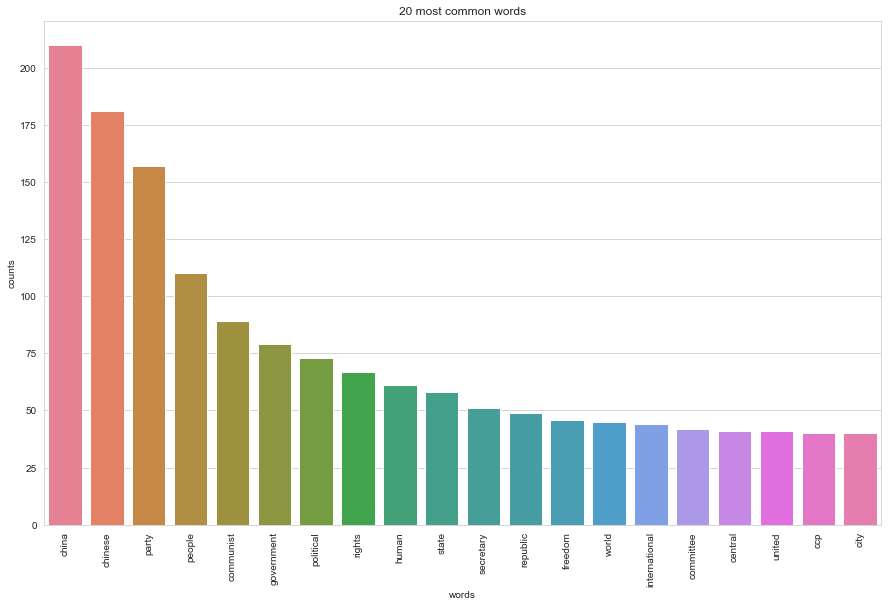

In [57]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
n_text = [text]
count_data = count_vectorizer.fit_transform(n_text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [58]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda[trigram_bow_corpus]):
    for j in row_list:
        topic_weights.append(row_list[0])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 20
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=1000, plot_height=600)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 322 samples in 0.011s...
[t-SNE] Computed neighbors for 322 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 322 / 322
[t-SNE] Mean sigma: 0.357487
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.426994
[t-SNE] KL divergence after 1000 iterations: 0.001043


Loading BokehJS ...

# Calculating text similarity with purely TF-IDF

In [ ]:
if 0==0:
    f = open("test.txt","r") 
    haha = []
    wuwu = []
    lines = f.read().splitlines()
    for line in lines:
        haha.append(line)
    for i in haha:
        wuwu.append(wikipedia.summary(i))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
similarity_test = []

In [ ]:
for i in wuwu:
    tfidf = TfidfVectorizer().fit_transform([i,text])
# no need to normalize, since Vectorizer will return normalized tf-idf
    pairwise_similarity = tfidf * tfidf.T
    similarity_test.append(pairwise_similarity.toarray()[0][1])

In [ ]:
test_result = pd.DataFrame(similarity_test)

In [ ]:
test_result.loc[test_result[0]>0.54, 'result'] =int(1)
test_result.loc[test_result[0]<0.54, 'result'] =int(0)

In [ ]:
test_result['truth'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                        1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
test_result.to_csv('pred.csv')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
test_result = pd.read_csv('pred.csv')
y_true = test_result['truth']
y_pred = test_result['result']
confusion_matrix(y_true, y_pred)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

# Calculating text similarity with tokenized TFIDF

In [ ]:
from gensim import corpora, models, similarities

In [ ]:
dictionary = trigram_dictionary
num_features = len(dictionary.token2id)
corpus = trigram_bow_corpus
tfidf = models.TfidfModel(corpus)
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features)

In [ ]:
predicted_2 = []
for i in wuwu:
    keyword = i
    new_vec = dictionary.doc2bow(keyword.split())
    sim = index[tfidf[new_vec]]
    sum_sim = 0
    for i in range(len(sim)):
        sum_sim +=sim[i]
    predicted_2.append(sum_sim)

In [ ]:
test_result_2 = pd.DataFrame(predicted_2)

In [ ]:
test_result_2.loc[test_result_2[0]>9, 'result'] =int(1)
test_result_2.loc[test_result_2[0]<9, 'result'] =int(0)

In [ ]:
test_result_2['truth'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                        1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
test_result_2.to_csv('pred_2.csv')
test_result_2 = pd.read_csv('pred_2.csv')
y_true = test_result_2['truth']
y_pred = test_result_2['result']
confusion_matrix(y_true, y_pred)

In [ ]:
roc_auc_score(y_true, y_pred)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_true, y_pred)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()